<a href="https://colab.research.google.com/github/kaylaque/baysmile/blob/main/Facial_Expression_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align=center> Facial Expression Recognition with Keras</h2>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/NJNischal/Facial-Expression-Recognition-with-CNNs.git

Cloning into 'Facial-Expression-Recognition-with-CNNs'...
remote: Enumerating objects: 34122, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 34122 (delta 19), reused 14 (delta 2), pack-reused 34080
Receiving objects: 100% (34122/34122), 100.31 MiB | 30.68 MiB/s, done.
Resolving deltas: 100% (23/23), done.
Checking out files: 100% (35915/35915), done.


In [ ]:
%cd /content/Facial-Expression-Recognition-with-CNNs

/content/Facial-Expression-Recognition-with-CNNs


### Task 1: Import L

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adamax
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
# from livelossplot import PlotLossesKeras
# from livelossplot import PlotLossesTensorFlowKeras
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.6.0


### Task 2: Plot Sample Image

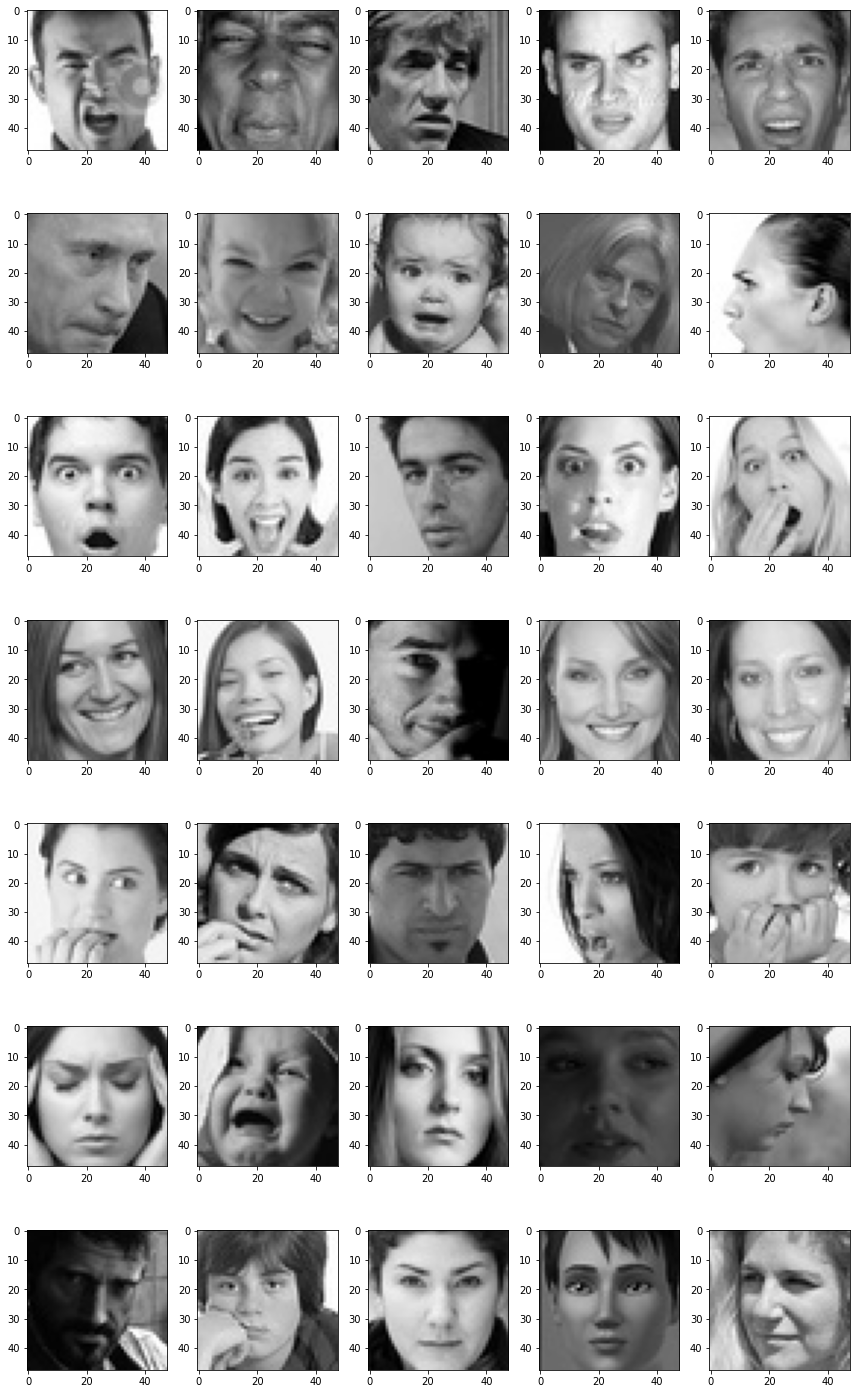

In [ ]:
utils.datasets.fer.plot_example_images(plt).show()

In [ ]:
classes = []
for expression in os.listdir("train/"):
    print(str(len(os.listdir("train/"+expression))) + " " + expression + " images.")
    classes.append(expression)

436 disgust images.
3995 angry images.
3171 surprise images.
7215 happy images.
4097 fear images.
4830 sad images.
4965 neutral images.


In [ ]:
for expression in os.listdir("test/"):
    print(str(len(os.listdir("test/"+expression))) + " " + expression + " images.")

111 disgust images.
958 angry images.
831 surprise images.
1774 happy images.
1024 fear images.
1247 sad images.
1233 neutral images.


In [ ]:
import os
lists = os.listdir("/content/Facial-Expression-Recognition-with-CNNs/train/")
classes = sorted(lists)

### Task 3: Generate Training and Validation Batches

In [ ]:
TRAIN = '/content/Facial-Expression-Recognition-with-CNNs/train/'
TEST = '/content/Facial-Expression-Recognition-with-CNNs/test/'

In [ ]:
img_size = 48
batch_size = 64

# Data generator to augment data for training
datagen_train = ImageDataGenerator(horizontal_flip=True)
train_generator = datagen_train.flow_from_directory(TRAIN, 
                                                    target_size=(img_size,img_size), 
                                                    color_mode='grayscale',
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   shuffle=True)

# Data generator to augment data for validation
validation_generator = datagen_train.flow_from_directory(TEST, 
                                                    target_size=(img_size,img_size), 
                                                    color_mode='grayscale',
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
Y_val = validation_generator.classes

In [ ]:
X_val = []
for i in range(validation_generator.__len__() ):
    X_val.extend(
        validation_generator.__getitem__( i )[0] 
        )
X_val = np.asarray(X_val).astype(np.float32)

In [ ]:
X_val.shape

(7178, 48, 48, 1)

### Task 4: Create CNN Model
Model was constructed and coded in [this link](https://github.com/NJNischal/Facial-Expression-Recognition-with-CNNs/blob/master/Facial_Expression_Training.ipynb)

![](https://github.com/NJNischal/Facial-Expression-Recognition-with-CNNs/blob/master/model.png?raw=1)
Inspired by Goodfellow, I.J., et.al. (2013). Challenged in representation learning: A report of three machine learning contests. *Neural Networks*, 64, 59-63. [doi:10.1016/j.neunet.2014.09.005](https://arxiv.org/pdf/1307.0414.pdf)

In [ ]:
model = Sequential()

# Conv Block 1
model.add(Conv2D(64, (3,3), padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 2
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 3
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 3
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected Block 1
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected Block 2
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


### Task 6: Train and Evaluate Model

In [ ]:
epochs = 100
steps_per_epoch= train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_loss',
                            save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss' , factor=0.1, patience=2, min_lr=0.00001,model='auto')

callbacks = [checkpoint, reduce_lr]

history = model.fit(
        x= train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_steps,
        callbacks=callbacks
)

Epoch 1/100
448/448 [==============================] - 61s 66ms/step - loss: 1.7992 - accuracy: 0.3137 - val_loss: 1.6118 - val_accuracy: 0.4028

Epoch 00001: saving model to model_weights.h5
Epoch 2/100
448/448 [==============================] - 29s 64ms/step - loss: 1.4709 - accuracy: 0.4387 - val_loss: 1.6205 - val_accuracy: 0.4350

Epoch 00002: saving model to model_weights.h5
Epoch 3/100
448/448 [==============================] - 29s 64ms/step - loss: 1.3245 - accuracy: 0.4934 - val_loss: 1.2853 - val_accuracy: 0.5092

Epoch 00003: saving model to model_weights.h5
Epoch 4/100
448/448 [==============================] - 29s 64ms/step - loss: 1.2422 - accuracy: 0.5256 - val_loss: 1.1860 - val_accuracy: 0.5487

Epoch 00004: saving model to model_weights.h5
Epoch 5/100
448/448 [==============================] - 29s 64ms/step - loss: 1.1863 - accuracy: 0.5460 - val_loss: 1.2026 - val_accuracy: 0.5459

Epoch 00005: saving model to model_weights.h5
Epoch 6/100
448/448 [===================

In [ ]:
def evaluate_model(history):
    names = [['accuracy', 'val_accuracy'], 
             ['loss', 'val_loss']]
            #  ['recall', 'val_recall'], ['precision', 'val_precision']]
    for name in names :
        fig1, ax_acc = plt.subplots()
        plt.plot(history.history[name[0]])
        plt.plot(history.history[name[1]])
        plt.xlabel('Epoch')
        plt.ylabel(name[0])
        plt.title('Model - ' + name[0])
        plt.legend(['Training', 'Validation'], loc='lower right')
        # if name[0] == 'accuracy':
        #   plt.xlim(0, 100)
        #   plt.ylim(0, 1)
        # else:
        #   plt.xlim(0, 100)
        #   plt.ylim(0, 2)
        plt.show()

In [ ]:
y_pred = model.predict(X_val)
len(y_pred)

7178

In [ ]:
pred = np.argmax(y_pred, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(Y_val, pred)

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(5, 5))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

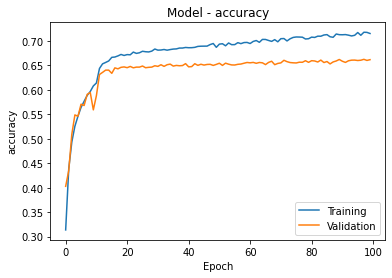

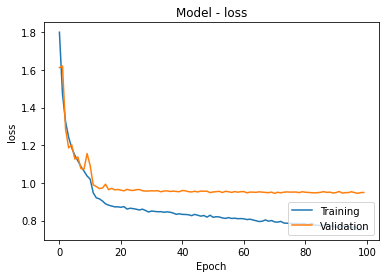

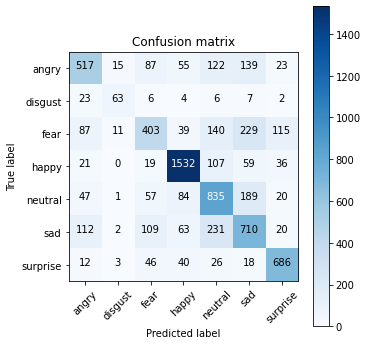

              precision    recall  f1-score   support

       angry       0.63      0.54      0.58       958
     disgust       0.66      0.57      0.61       111
        fear       0.55      0.39      0.46      1024
       happy       0.84      0.86      0.85      1774
     neutral       0.57      0.68      0.62      1233
         sad       0.53      0.57      0.55      1247
    surprise       0.76      0.83      0.79       831

    accuracy                           0.66      7178
   macro avg       0.65      0.63      0.64      7178
weighted avg       0.66      0.66      0.66      7178



In [ ]:
#Adam Learning Rate : 0.0005, min learning rate on reduce: 0.0001, dropout: 0.25, epoch 100
evaluate_model(history)
# Plot non-normalized confusion matrix
plot_confusion_matrix(cm, 
                      classes,
                      normalize=False,
                      title='Confusion matrix')
print(classification_report(Y_val, 
                            pred, 
                            target_names=classes))

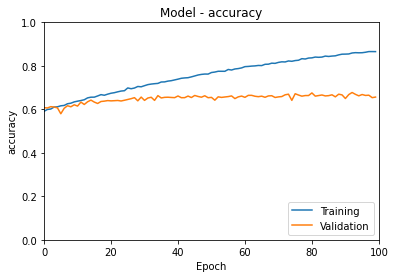

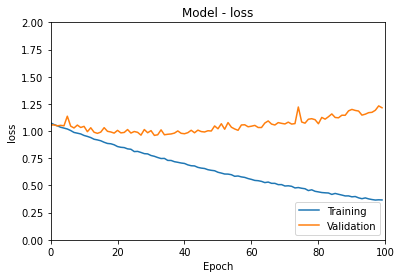

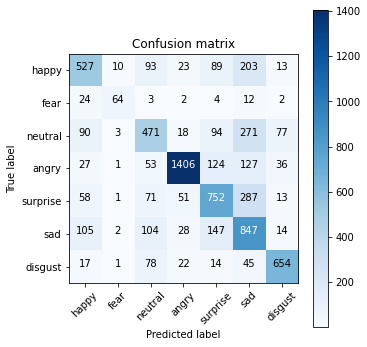

              precision    recall  f1-score   support

       happy       0.62      0.55      0.58       958
        fear       0.78      0.58      0.66       111
     neutral       0.54      0.46      0.50      1024
       angry       0.91      0.79      0.85      1774
    surprise       0.61      0.61      0.61      1233
         sad       0.47      0.68      0.56      1247
     disgust       0.81      0.79      0.80       831

    accuracy                           0.66      7178
   macro avg       0.68      0.64      0.65      7178
weighted avg       0.68      0.66      0.66      7178



In [ ]:
#Adam Learning Rate : 0.0001, min learning rate on reduce: DISABLE, dropout: 0.3, epoch 100
evaluate_model(history)
# Plot non-normalized confusion matrix
plot_confusion_matrix(cm, 
                      classes,
                      normalize=False,
                      title='Confusion matrix')
print(classification_report(Y_val, 
                            pred, 
                            target_names=classes))

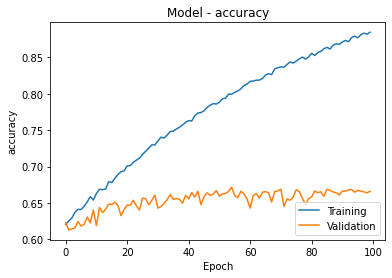

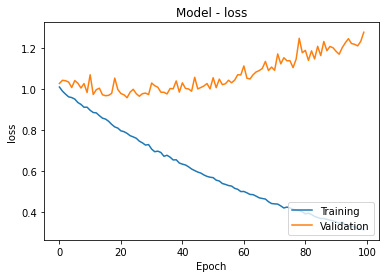

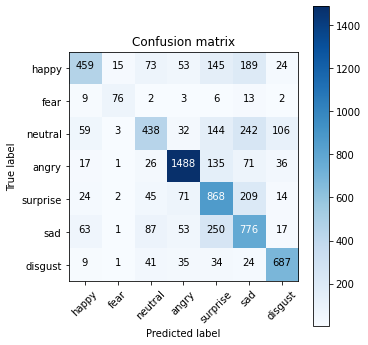

              precision    recall  f1-score   support

       happy       0.72      0.48      0.57       958
        fear       0.77      0.68      0.72       111
     neutral       0.62      0.43      0.50      1024
       angry       0.86      0.84      0.85      1774
    surprise       0.55      0.70      0.62      1233
         sad       0.51      0.62      0.56      1247
     disgust       0.78      0.83      0.80       831

    accuracy                           0.67      7178
   macro avg       0.68      0.65      0.66      7178
weighted avg       0.68      0.67      0.67      7178



In [ ]:
#Adam Learning Rate : 0.0001, min learning rate on reduce: DISABLE, dropout: 0.25, epoch 100
evaluate_model(history)
# Plot non-normalized confusion matrix
plot_confusion_matrix(cm, 
                      classes,
                      normalize=False,
                      title='Confusion matrix')
print(classification_report(Y_val, 
                            pred, 
                            target_names=classes))

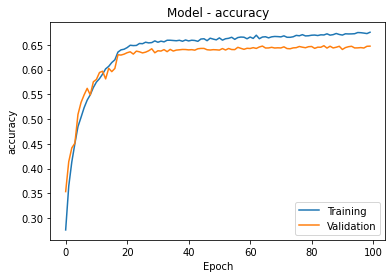

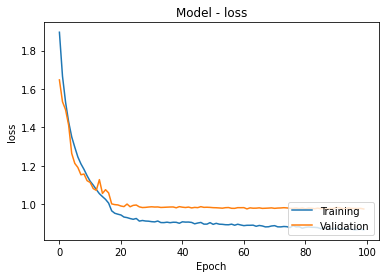

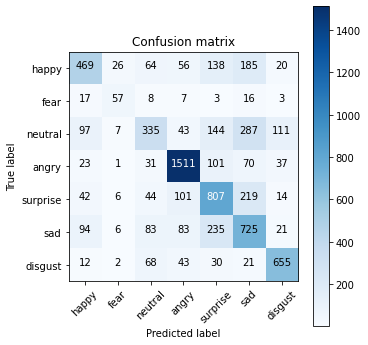

              precision    recall  f1-score   support

       happy       0.62      0.49      0.55       958
        fear       0.54      0.51      0.53       111
     neutral       0.53      0.33      0.40      1024
       angry       0.82      0.85      0.84      1774
    surprise       0.55      0.65      0.60      1233
         sad       0.48      0.58      0.52      1247
     disgust       0.76      0.79      0.77       831

    accuracy                           0.64      7178
   macro avg       0.61      0.60      0.60      7178
weighted avg       0.64      0.64      0.63      7178



In [ ]:
#Adam Learning Rate : 0.005, min learning rate on reduce: DISABLE, dropout: 0.5, epoch 30
evaluate_model(history)
# Plot non-normalized confusion matrix
plot_confusion_matrix(cm, 
                      classes,
                      normalize=False,
                      title='Confusion matrix')
print(classification_report(Y_val, 
                            pred, 
                            target_names=classes))

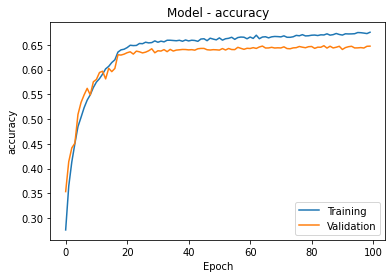

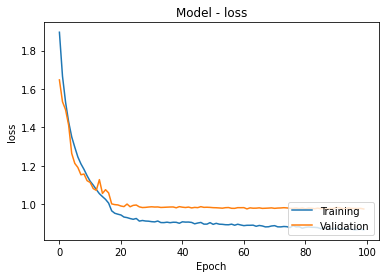

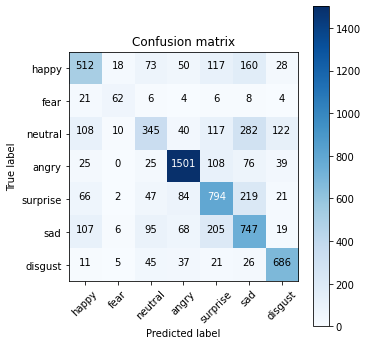

              precision    recall  f1-score   support

       happy       0.60      0.53      0.57       958
        fear       0.60      0.56      0.58       111
     neutral       0.54      0.34      0.42      1024
       angry       0.84      0.85      0.84      1774
    surprise       0.58      0.64      0.61      1233
         sad       0.49      0.60      0.54      1247
     disgust       0.75      0.83      0.78       831

    accuracy                           0.65      7178
   macro avg       0.63      0.62      0.62      7178
weighted avg       0.65      0.65      0.64      7178



In [ ]:
#Adam Learning Rate : 0.005, min learning rate on reduce: 0.00001, epoch 100
evaluate_model(history)
# Plot non-normalized confusion matrix
plot_confusion_matrix(cm, 
                      classes,
                      normalize=False,
                      title='Confusion matrix')
print(classification_report(Y_val, 
                            pred, 
                            target_names=classes))

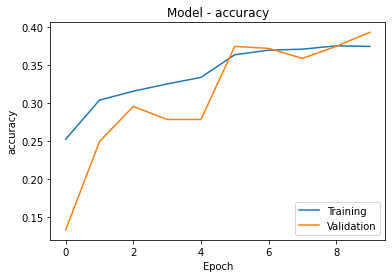

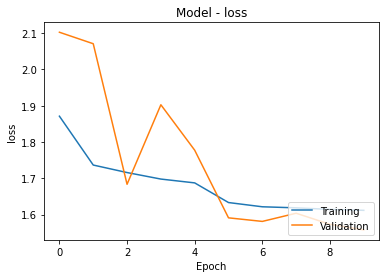

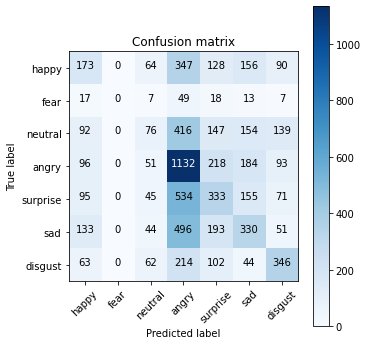

              precision    recall  f1-score   support

       happy       0.26      0.18      0.21       958
        fear       0.00      0.00      0.00       111
     neutral       0.22      0.07      0.11      1024
       angry       0.36      0.64      0.46      1774
    surprise       0.29      0.27      0.28      1233
         sad       0.32      0.26      0.29      1247
     disgust       0.43      0.42      0.43       831

    accuracy                           0.33      7178
   macro avg       0.27      0.26      0.25      7178
weighted avg       0.31      0.33      0.30      7178



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Adam Learning Rate : 0.005, min learning rate on reduce: 0.00001, transfer learning effnetb7
evaluate_model(history)
# Plot non-normalized confusion matrix
plot_confusion_matrix(cm, 
                      classes,
                      normalize=False,
                      title='Confusion matrix')
print(classification_report(Y_val, 
                            pred, 
                            target_names=classes))

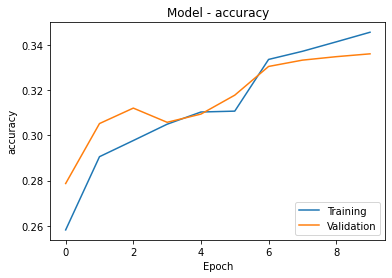

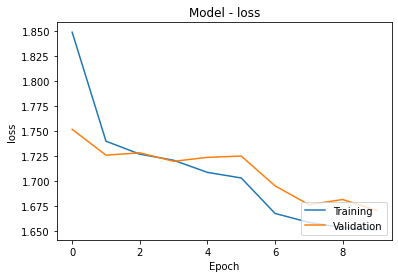

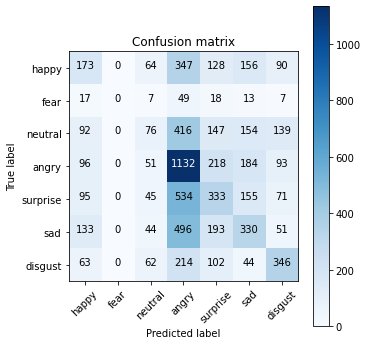

              precision    recall  f1-score   support

       happy       0.26      0.18      0.21       958
        fear       0.00      0.00      0.00       111
     neutral       0.22      0.07      0.11      1024
       angry       0.36      0.64      0.46      1774
    surprise       0.29      0.27      0.28      1233
         sad       0.32      0.26      0.29      1247
     disgust       0.43      0.42      0.43       831

    accuracy                           0.33      7178
   macro avg       0.27      0.26      0.25      7178
weighted avg       0.31      0.33      0.30      7178



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Adam Learning Rate : 0.005, min learning rate on reduce: 0.00001, transfer learning mobilenetv2
evaluate_model(history)
# Plot non-normalized confusion matrix
plot_confusion_matrix(cm, 
                      classes,
                      normalize=False,
                      title='Confusion matrix')
print(classification_report(Y_val, 
                            pred, 
                            target_names=classes))

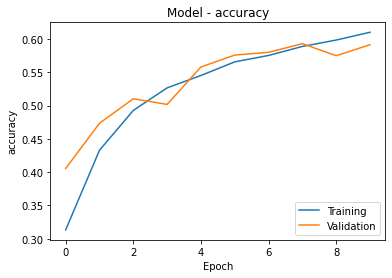

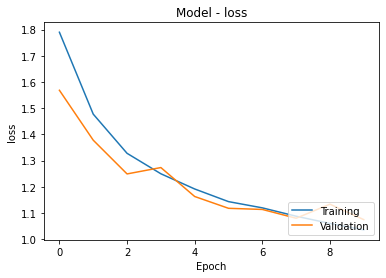

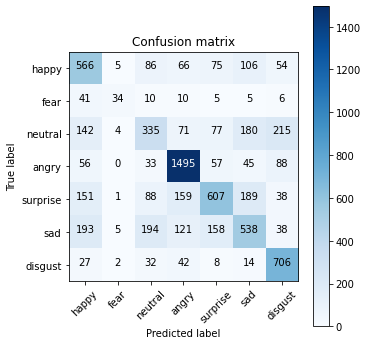

              precision    recall  f1-score   support

       happy       0.48      0.59      0.53       958
        fear       0.67      0.31      0.42       111
     neutral       0.43      0.33      0.37      1024
       angry       0.76      0.84      0.80      1774
    surprise       0.61      0.49      0.55      1233
         sad       0.50      0.43      0.46      1247
     disgust       0.62      0.85      0.71       831

    accuracy                           0.60      7178
   macro avg       0.58      0.55      0.55      7178
weighted avg       0.59      0.60      0.59      7178



In [ ]:
#Adam Learning Rate : 0.0005, min learning rate on reduce: 0.00001
evaluate_model(history)
# Plot non-normalized confusion matrix
plot_confusion_matrix(cm, 
                      classes,
                      normalize=False,
                      title='Confusion matrix')
print(classification_report(Y_val, 
                            pred, 
                            target_names=classes))

### Task 7: Represent Model as JSON String

In [ ]:
# %cd "/content/drive/MyDrive/LKTI - BAYMAX/codes"
%cd /content/drive/MyDrive/codes

/content/drive/.shortcut-targets-by-id/10T3HN70uW_nciANx0aMalKWddicYPPoL/codes


In [ ]:
!mkdir ./savedmodel03
tf.keras.models.save_model(model, "./savedmodel03")

INFO:tensorflow:Assets written to: ./savedmodel03/assets


In [ ]:

from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
# dd/mm/YY H:M:S
dt_string = now.strftime("%d-%m-%Y--%H:%M:%S")
print("date and time =", dt_string)

model_json = model.to_json()
with open("model"+ dt_string+ ".json","w") as json_file:
    json_file.write(model_json)

date and time = 04-11-2021--09:01:49
